In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
Arrests = pd.read_csv("Arrests.csv")
Arrests = Arrests.drop("Unnamed: 0", axis = 1)

In [3]:
Catcolumns = ["released", 'employed', 'citizen']
for Column in Catcolumns:
    Arrests[Column] = Arrests[Column].map(dict(Yes=1, No=0))
Arrests["colour"] = Arrests["colour"].map(dict(White=1, Black=0))

In [4]:
Arrests.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,Male,1,1,3
1,0,0,1999,17,Male,1,1,3
2,1,1,2000,24,Male,1,1,3
3,0,0,2000,46,Male,1,1,1
4,1,0,1999,27,Female,1,1,1


In [5]:
ArrestsWhite = Arrests [ Arrests["colour"] == 1]
ArrestsBlack = Arrests [ Arrests["colour"] == 0]

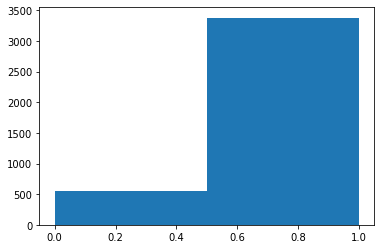

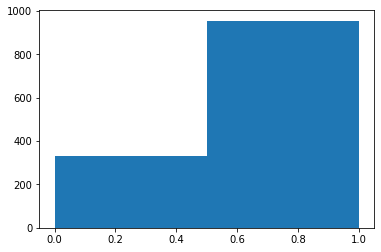

In [6]:
plt.hist(ArrestsWhite['released'], bins = 2)
plt.show()
plt.hist(ArrestsBlack['released'], bins = 2)
plt.show()

In [7]:
race_model = LinearRegression().fit(Arrests[["colour"]], Arrests["released"])
race_model.coef_

array([0.11659014])

In [8]:
check_model = LinearRegression().fit(Arrests[["colour"]], Arrests["checks"])

In [9]:
checkrelease_model = LinearRegression().fit(Arrests[["checks"]], Arrests["released"])

In [10]:
check_model.coef_

array([-0.61436111])

In [11]:
checkrelease_model.coef_

array([-0.06101365])

In [12]:
print(f'Mean # of Checks for Black Arrests {ArrestsBlack["checks"].mean()}')
print(f'Mean # of Checks for White Arrests {ArrestsWhite["checks"].mean()}')      

Mean # of Checks for Black Arrests 2.099378881987578
Mean # of Checks for White Arrests 1.485017775520569


In [13]:
whiteCount = ArrestsWhite.groupby(["year"]).count()
blackCount = ArrestsBlack.groupby(["year"]).count()

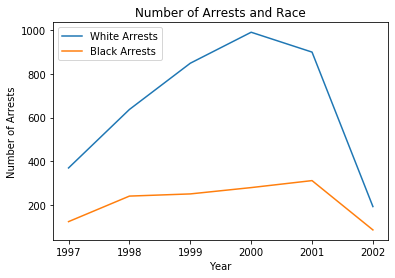

In [161]:
plt.plot(whiteCount.index, whiteCount["released"], label = "White Arrests")
plt.plot(blackCount.index, blackCount["released"], Label = "Black Arrests")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests and Race")
plt.legend()
plt.show()

In [27]:
whiteYearSum = ArrestsWhite.groupby(["year"]).sum()
blackYearSum = ArrestsBlack.groupby(["year"]).sum()

In [40]:
whiteYearSum["totinstance"] = whiteCount["age"]
blackYearSum["totinstance"] = blackCount["age"]
whiteYearSum["releasefrequency"] = (whiteYearSum["released"]/whiteYearSum["totinstance"])
blackYearSum["releasefrequency"] = (blackYearSum["released"]/blackYearSum["totinstance"])

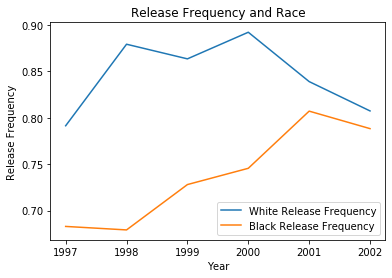

In [160]:
plt.plot(whiteYearSum.index, whiteYearSum["releasefrequency"], label = "White Release Frequency")
plt.plot(blackYearSum.index, blackYearSum["releasefrequency"], Label = "Black Release Frequency")
plt.xlabel("Year")
plt.ylabel("Release Frequency")
plt.title("Release Frequency and Race")
plt.legend()
plt.show()

In [42]:
ageCount = Arrests.groupby(["age"]).count()
whiteAgeCount = ArrestsWhite.groupby(["age"]).count()
blackAgeCount = ArrestsBlack.groupby(["age"]).count()

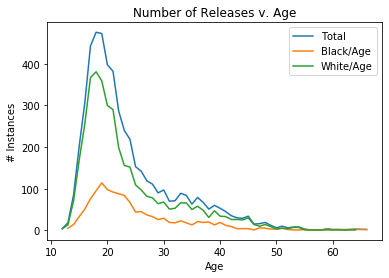

In [153]:
plt.plot(ageCount.index, ageCount["released"], label = "Total")
plt.plot(blackAgeCount.index, blackAgeCount["released"], Label = "Black/Age")
plt.plot(whiteAgeCount.index, whiteAgeCount["released"], Label = "White/Age")
plt.xlabel("Age")
plt.ylabel("# Instances")
plt.title("Number of Releases v. Age")
plt.legend()
plt.show()

In [ ]:
plt.plot(blackAgeCount.index, blackAgeCount["released"], Label = "Black/Age")
plt.plot(whiteAgeCount.index, whiteAgeCount["released"], Label = "White/Age")
plt.xlabel("Age")
plt.ylabel("#Instances")
plt.legend()
plt.show()

In [50]:
genderCount = Arrests.groupby(["sex"]).count()
maleCount = ArrestsWhite.groupby(["sex"]).count()
femaleCount = ArrestsBlack.groupby(["sex"]).count()

In [54]:
Arrests["sex"] = Arrests["sex"].map(dict(Male=1, Female=0))

In [86]:
year_list = [1997,1998,1999,2000,2001,2002]
male_year_avg = []
female_year_avg = []
for year in year_list:
    male_r = 0
    male_u = 0
    female_r = 0
    female_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["sex"][x] == 1:
            if Arrests["released"][x] == 1:
                male_r += 1
            elif Arrests["released"][x] == 0:
                male_u += 1
        elif Arrests["sex"][x] == 0:
            if Arrests["released"][x] == 1:
                female_r += 1
            elif Arrests["released"][x] == 0:
                female_u += 1
    male_year_avg.append(male_r/(male_r+male_u))
    female_year_avg.append(female_r/(female_r+female_u))
                
    

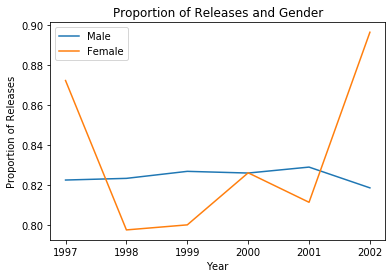

In [159]:
plt.plot(year_list, male_year_avg, Label = "Male")
plt.plot(year_list, female_year_avg, Label = "Female")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Gender")
plt.legend()
plt.show()

In [111]:
year_list = [1997,1998,1999,2000,2001,2002]
Citizen_avg = []
Noncitizen_avg = []
for year in year_list:
    citizen_r = 0
    citizen_u = 0
    noncitizen_r = 0
    noncitizen_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["citizen"][x] == 1:
            if Arrests["released"][x] == 1:
                citizen_r += 1
            elif Arrests["released"][x] == 0:
                citizen_u += 1
        elif Arrests["citizen"][x] == 0:
            if Arrests["released"][x] == 1:
                noncitizen_r += 1
            elif Arrests["released"][x] == 0:
                noncitizen_u += 1
    Citizen_avg.append(citizen_r/(citizen_r+citizen_u))
    Noncitizen_avg.append(noncitizen_r/(noncitizen_r+noncitizen_u))

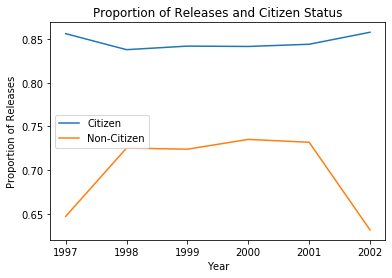

In [157]:
plt.plot(year_list, Citizen_avg, Label = "Citizen")
plt.plot(year_list, Noncitizen_avg, Label = "Non-Citizen")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Citizen Status")
plt.legend()
plt.show()

In [104]:
year_list = [1997,1998,1999,2000,2001,2002]
Employed_avg = []
Unemployed_avg = []
for year in year_list:
    employ_r = 0
    employ_u = 0
    unemploy_r = 0
    unemploy_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["employed"][x] == 1:
            if Arrests["released"][x] == 1:
                employ_r += 1
            elif Arrests["released"][x] == 0:
                employ_u += 1
        elif Arrests["employed"][x] == 0:
            if Arrests["released"][x] == 1:
                unemploy_r += 1
            elif Arrests["released"][x] == 0:
                unemploy_u += 1
    Employed_avg.append(employ_r/(employ_r+employ_u))
    Unemployed_avg.append(unemploy_r/(unemploy_r+unemploy_u))

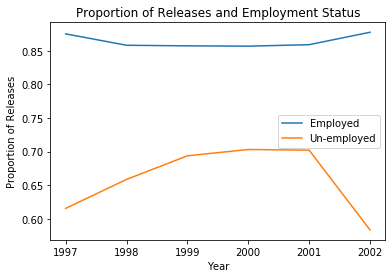

In [163]:
plt.plot(year_list, Employed_avg, Label = "Employed")
plt.plot(year_list, Unemployed_avg, Label = "Un-employed")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Employment Status")
plt.legend()
plt.show()

In [138]:
citizenEmployedModel = LinearRegression().fit(Arrests[["employed", "citizen"]], Arrests["released"])

In [148]:
print(citizenEmployedModel.coef_)

[0.17368778 0.10660583]


In [140]:
citizenModel = LinearRegression().fit(Arrests[["citizen"]], Arrests["released"])
employedModel = LinearRegression().fit(Arrests[["employed"]], Arrests["released"])

In [142]:
print(citizenModel.coef_)
print(employedModel.coef_)

[0.12233009]
[0.18091983]


In [146]:
np.corrcoef(Arrests["employed"], Arrests["citizen"])

array([[1.        , 0.07836839],
       [0.07836839, 1.        ]])

In [147]:
np.corrcoef(Arrests["employed"], Arrests["released"])

array([[1.        , 0.19700193],
       [0.19700193, 1.        ]])

In [149]:
np.corrcoef(Arrests["citizen"], Arrests["released"])

array([[1.        , 0.11530747],
       [0.11530747, 1.        ]])